## EXERCISES OF MACHINE LEARNING 

In [4]:
pip install simpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### EXERCISE NUMBER 1 

In [9]:
#Uso de Simpy
def car(env):
    while True:
        print('Start Parking at', env.now)
        parking_duration = 5
        yield env.timeout(parking_duration)
        
        print('Start Driving at', env.now)
        trip_duration=2
        yield env.timeout(trip_duration)
        
import simpy
env = simpy.Environment()
env.process(car(env))
env.run(until=15)

Start Parking at 0
Start Driving at 5
Start Parking at 7
Start Driving at 12
Start Parking at 14


### EXECIRSE NUMBER 2

In [8]:
class Car(object):
    def __init__(self, env):
        self.env = env
        #Empieza el proceso de ejecución cada vez que una instancia 
        #es creada
        self.action = env.process(self.run())
        
    def run(self):
        while True:
            print('Start parking and charging at', self.env.now)
            charging_duration = 5
            yield self.env.process(self.charge(charging_duration))
                    
            print('Start drivin at', self.env.now)
            trip_duration = 2
            yield self.env.timeout(trip_duration)
                    
    def charge(self,duration):
        yield self.env.timeout(duration)
            

import simpy
env = simpy.Environment()
car = Car(env)
env.run(until=15)
            

Start parking and charging at 0
Start drivin at 5
Start parking and charging at 7
Start drivin at 12
Start parking and charging at 14


In [12]:
class Car(object):
    def __init__(self, env):
        self.env = env
        #Empieza el proceso de ejecución cada vez que una instancia 
        #es creada
        self.action = env.process(self.run())
        
    def run(self):
        while True:
            print('Start parking and charging at', self.env.now)
            charging_duration = 5
            try:
                yield self.env.process(self.charge(charging_duration))
            except simpy.Interrupt:
                print('Was interrupted. Hope, the battery is full enough..')
                    
            print('Start drivin at', self.env.now)
            trip_duration = 2
            yield self.env.timeout(trip_duration)
                    
    def charge(self,duration):
        yield self.env.timeout(duration)

def driver(env, car):
    yield env.timeout(5)
    car.action.interrupt()
            

import simpy
env = simpy.Environment()
car = Car(env)
env.process(driver(env,car))
env.run(until=15)
            

Start parking and charging at 0
Was interrupted. Hope, the battery is full enough..
Start drivin at 5
Start parking and charging at 7
Start drivin at 12
Start parking and charging at 14


### EXERCISE N°3

Digite la cantidad de ventanillas12
Llegada del cliente  1 :   0.09859996419050293
Cliente siendo atendido 0.09859996419050293
Cliente  1  sale  0.20202339134408412
Llegada del cliente  2 :   0.39823983185586254
Cliente siendo atendido 0.39823983185586254
Llegada del cliente  3 :   0.444843438077346
Cliente siendo atendido 0.444843438077346
Cliente  3  sale  0.46206928333640696
Cliente  2  sale  0.6805847523187323
Llegada del cliente  4 :   1.8256152840242104
Cliente siendo atendido 1.8256152840242104
Llegada del cliente  5 :   1.8477324404714368
Cliente siendo atendido 1.8477324404714368
Llegada del cliente  6 :   1.9295779675773561
Cliente siendo atendido 1.9295779675773561
Llegada del cliente  7 :   1.9962406955466496
Cliente siendo atendido 1.9962406955466496
Cliente  5  sale  1.9979226191191768
Cliente  7  sale  2.042656852455793
Llegada del cliente  8 :   2.332594359069325
Cliente siendo atendido 2.332594359069325
Llegada del cliente  9 :   2.4036613176125803
Cliente siendo atend

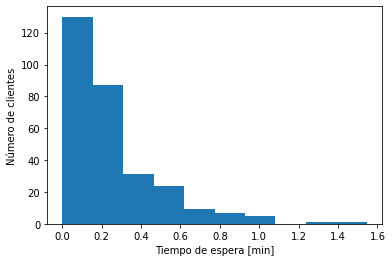

In [21]:
global contador 
#Ejemplo comprar tiquete para concierto
tiempo_espera=[]
def llegadas():
    #tres clientes por minuto
    return np.random.exponential(1/3)

def servicio():
    return np.random.exponential(1/4)

def concierto(env):
    contador = 0
    while True:
        yield env.timeout(llegadas())
        contador += 1
        env.process(cliente(env,contador,ventanillas))        

def cliente(env,num,ventanillas):
    with ventanillas.request() as solicitud:
        t_llegada = env.now
        print('Llegada del cliente ',num,':  ' ,env.now)
        yield solicitud
        print('Cliente siendo atendido', env.now)
        yield env.timeout(servicio())
        print('Cliente ',num, ' sale ',env.now)
        t_salida=env.now
        tiempoEspera.append(t_salida-t_llegada)
    
#Programa principal
import simpy
import numpy as np
env=simpy.Environment()
cant = int(input("Digite la cantidad de ventanillas"))
ventanillas=simpy.Resource(env,capacity=cant)
env.process(concierto(env))
env.run(until=10)

import matplotlib.pyplot as plptl
plptl.hist(tiempoEspera)
plptl.xlabel('Tiempo de espera [min]')
plptl.ylabel('Número de clientes')
plptl.show()

### EXERCISE N°4
